<a href="https://colab.research.google.com/github/Altamsh16/AI_PROJECTS/blob/main/Program4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 100/2000, Loss: 0.2301808790456909
Epoch 200/2000, Loss: 0.21945643623685843
Epoch 300/2000, Loss: 0.20858467793490365
Epoch 400/2000, Loss: 0.1970478572387448
Epoch 500/2000, Loss: 0.18476257821462017
Epoch 600/2000, Loss: 0.17184078109749312
Epoch 700/2000, Loss: 0.15846386547528524
Epoch 800/2000, Loss: 0.14484938434824096
Epoch 900/2000, Loss: 0.13125619031818286
Epoch 1000/2000, Loss: 0.11798274968697545
Epoch 1100/2000, Loss: 0.10533705814098746
Epoch 1200/2000, Loss: 0.09358704716956609
Epoch 1300/2000, Loss: 0.08291777793435791
Epoch 1400/2000, Loss: 0.07341483645369198
Epoch 1500/2000, Loss: 0.0650745063903519
Epoch 1600/2000, Loss: 0.05782886848104406
Epoch 1700/2000, Loss: 0.05157315977812443
Epoch 1800/2000, Loss: 0.04618797202494956
Epoch 1900/2000, Loss: 0.04155414563948464
Epoch 2000/2000, Loss: 0.03756121268007388


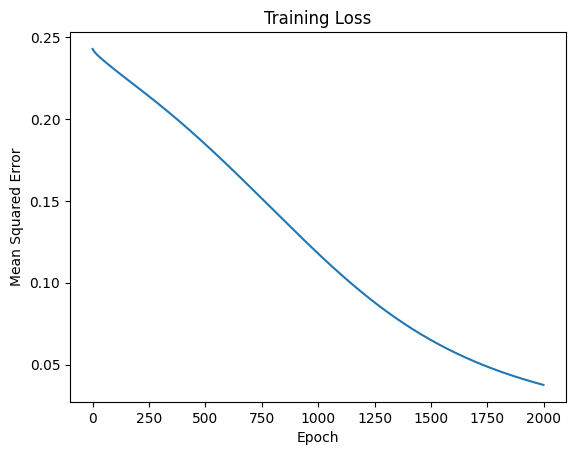

Predictions:
Input: [0 0], Target: [0], Prediction: [0.14389474]
Input: [0 1], Target: [1], Prediction: [0.78979922]
Input: [1 0], Target: [1], Prediction: [0.81751228]
Input: [1 1], Target: [0], Prediction: [0.22782641]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the NeuralNetwork class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize network parameters (weights and biases)
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        # Backpropagation
        error = y - output
        delta2 = error * self.sigmoid_derivative(output)
        error_hidden = delta2.dot(self.W2.T)
        delta1 = error_hidden * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += self.a1.T.dot(delta2) * learning_rate
        self.b2 += np.sum(delta2, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(delta1) * learning_rate
        self.b1 += np.sum(delta1, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        # Training loop
        loss_history = []
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Backpropagation and parameter update
            self.backward(X, y, output, learning_rate)

            # Compute and store loss
            loss = np.mean(np.square(y - output))
            loss_history.append(loss)

            # Print progress
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

        return loss_history

    def predict(self, X):
        # Make predictions
        return self.forward(X)

# Prepare XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize and train the neural network
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 2000

model = NeuralNetwork(input_size, hidden_size, output_size)
loss_history = model.train(X, y, epochs=epochs, learning_rate=learning_rate)

# Plot the loss curve
plt.plot(range(epochs), loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

# Make predictions on the training data
predictions = model.predict(X)
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {predictions[i]}")


